In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [ ]:
# Dataset comming from:
# https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada?resource=download

folder = "/Users/luisfaria/Desktop/sEngineer/masters_SWEAI/2025-T2/T2-REM/modules/module_10_data-interpretation/"
file_name = "canadian_immegration_data.csv"
file_url = folder + file_name
df = pd.read_csv(file_url)

df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


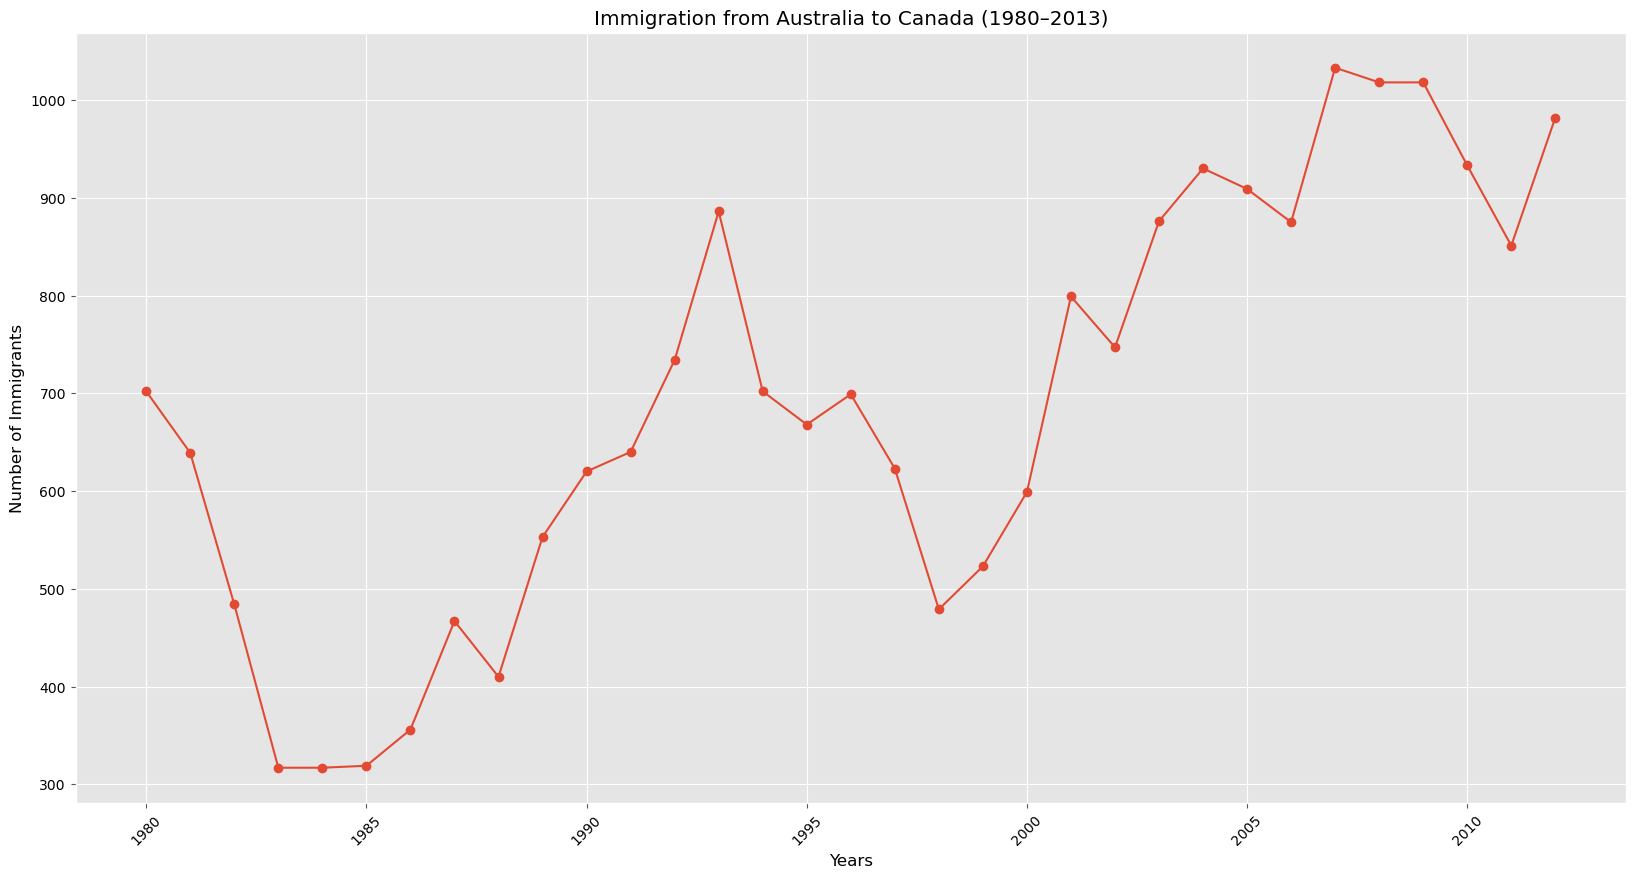

In [36]:
chosen_country = 'Australia'
df_country = df.loc[df['Country'] == chosen_country]

# Slice all year columns, 1980 to 2013
years = [str(y) for y in range(1980, 2013)]

# Extract immigration numbers for country
aus_series = df_country.loc[df_country.index[0], years]

# Plot
fig = aus_series.plot(kind='line', marker='o')

plt.title(f'Immigration from {chosen_country} to Canada (1980–2013)', color='black')
plt.xlabel('Years', color='black')
plt.ylabel('Number of Immigrants', color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')

plt.savefig('country_immigration_trend.png', dpi=300)
plt.show()

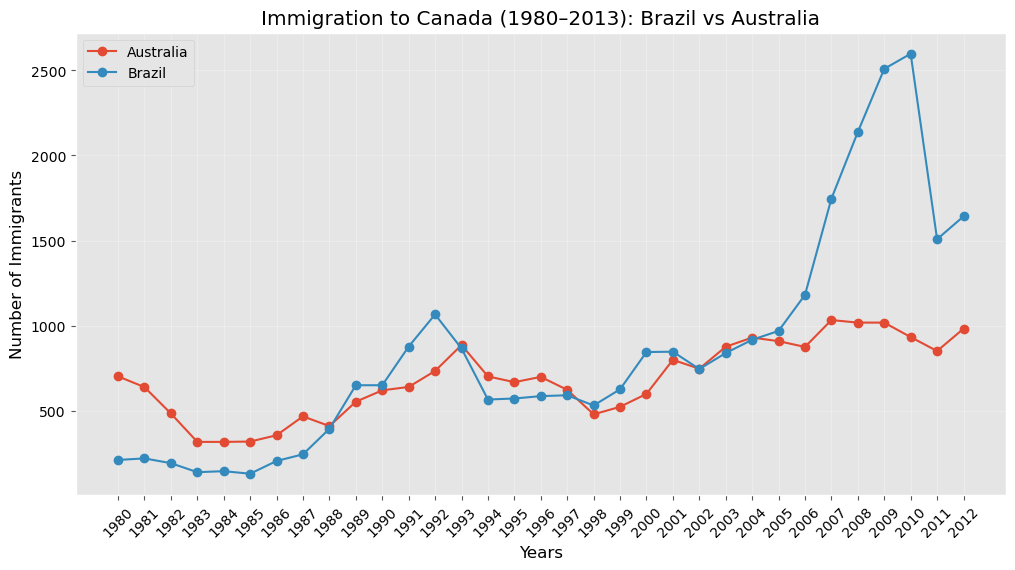

In [40]:
# Extract immigration series
aus_series = df.loc[df['Country'] == 'Australia', years].squeeze()
bra_series = df.loc[df['Country'] == 'Brazil', years].squeeze()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(years, aus_series, marker='o', label='Australia')
plt.plot(years, bra_series, marker='o', label='Brazil')

plt.title('Immigration to Canada (1980–2013): Brazil vs Australia', color='black')
plt.xlabel('Years', color='black')
plt.ylabel('Number of Immigrants', color='black')
plt.xticks(rotation=45, color='black')
plt.yticks(color='black')

plt.legend()
plt.grid(alpha=0.3)

plt.savefig('immigration_evolution_brazil_vs_australia.png', dpi=300, bbox_inches='tight')
plt.show()

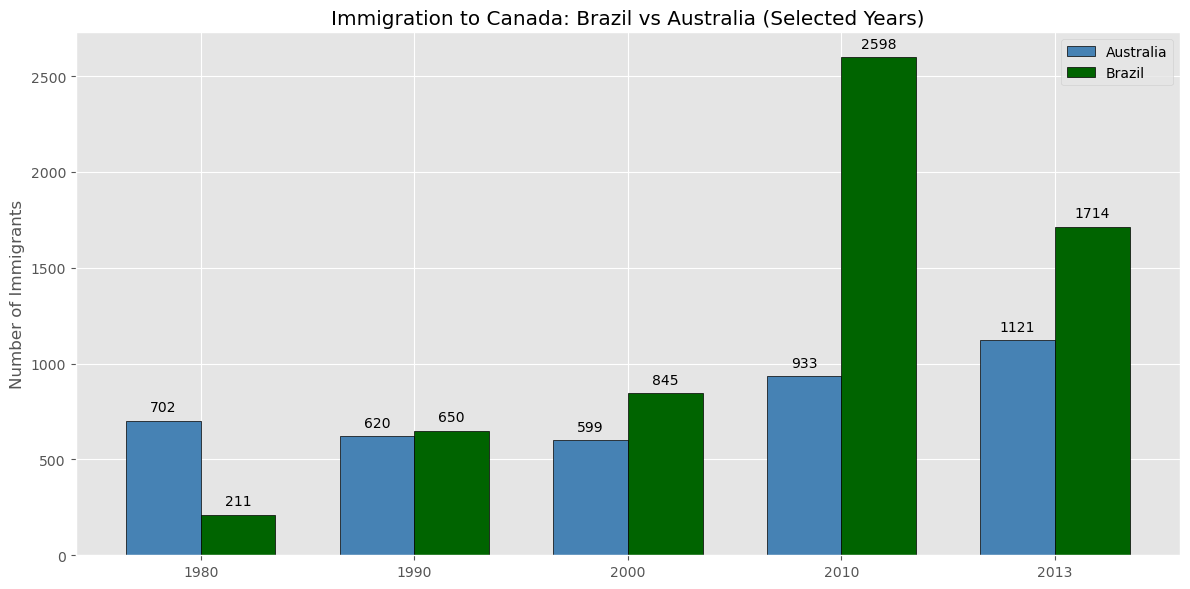

In [47]:
# Pick key years for comparison
selected_years = ['1980', '1990', '2000', '2010', '2013']

# Extract values
aus_vals = df.loc[df['Country'] == 'Australia', selected_years].squeeze()
bra_vals = df.loc[df['Country'] == 'Brazil', selected_years].squeeze()

# X positions
x = np.arange(len(selected_years))
width = 0.35  # width of each bar

plt.figure(figsize=(12, 6))

# Bars
plt.bar(x - width/2, aus_vals, width, label='Australia', color='steelblue', edgecolor='black', linewidth=0.5)
plt.bar(x + width/2, bra_vals, width, label='Brazil', color='darkgreen', edgecolor='black', linewidth=0.5)

# Labels
plt.xticks(x, selected_years, rotation=0)
plt.ylabel('Number of Immigrants')
plt.title('Immigration to Canada: Brazil vs Australia (Selected Years)')
plt.legend()

# Add bar values on top
for i, v in enumerate(aus_vals):
    plt.text(i - width/2, v + 50, str(v), ha='center', color='black')

for i, v in enumerate(bra_vals):
    plt.text(i + width/2, v + 50, str(v), ha='center', color='black')

plt.tight_layout()
plt.savefig('grouped_bars_brazil_australia.png', dpi=300)
plt.show()